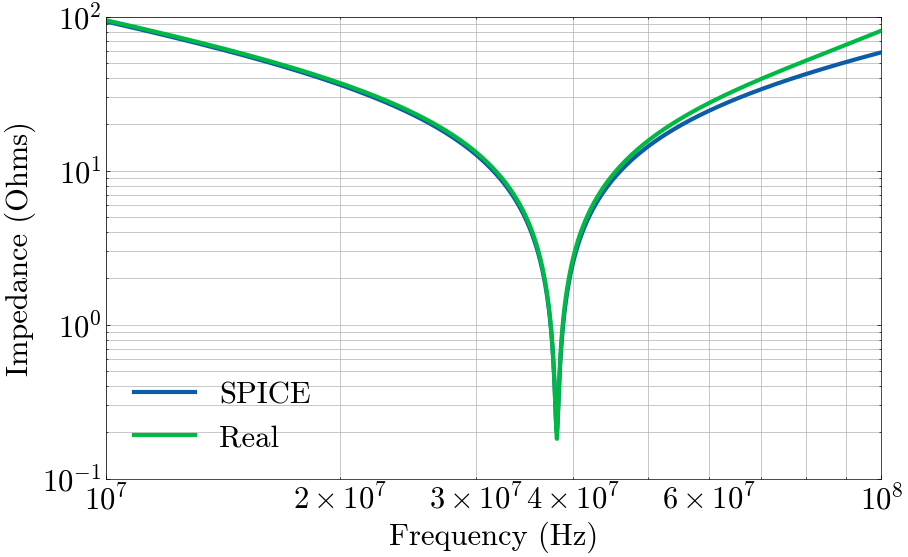

In [79]:
import np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import ltspice
import os
plt.style.use(['science','no-latex'])
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,6))

filepath_spice = 'phi_2_50MHz_EPC2214.raw'
l = ltspice.Ltspice(filepath_spice)
l.parse()

# SPICE data
freq = l.get_frequency()
Z_out_spice = l.get_data('V(zout)')


# Real data
headers = ['Frequency', 'Z']
df = pd.read_csv('Zout.csv', names=headers)
Z_out_exp = df['Z']
freq_exp = df['Frequency']


plt.loglog(freq, np.abs(Z_out_spice), linewidth=3, linestyle='solid', label = 'SPICE')
plt.loglog(df.Frequency, df.Z, linewidth=3, linestyle='solid', label = 'Real')
plt.ylim([1E-1,1E2])
plt.xlim([1E7,1E8])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance (Ohms)')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.show()